In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv("/Users/lewisclark/Downloads/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [6]:
crosstab_pct = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') * 100
crosstab_pct = crosstab_pct.rename(columns={False: 'not bestseller %', True: 'bestseller %'})

In [7]:
crosstab_pct.head(2)

isBestSeller,not bestseller %,bestseller %
category,,
3D Printers,99.596774,0.403226
3D Printing & Scanning,99.950824,0.049176


In [9]:
crosstab_pct.sort_values('bestseller %', ascending=False).head()

isBestSeller,not bestseller %,bestseller %
category,,
Grocery,94.186533,5.813467
Smart Home Security & Lighting,94.230769,5.769231
Health & Personal Care,94.231372,5.768628
Mobile Phone Accessories,95.752896,4.247104
Power & Hand Tools,96.466105,3.533895


In [10]:
from scipy.stats import chi2_contingency

In [11]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

In [12]:
print("Chi2:", chi2_statistic)
print("p_value:", chi2_p_value)

Chi2: 36540.20270061387
p_value: 0.0


In [13]:
### so because p_value is so low, then it is likely there is a significant correlation between
### the category and the item becoming a best seller

In [14]:
from scipy.stats.contingency import association

In [15]:
association(crosstab_result, method="cramer")

0.1222829439760564

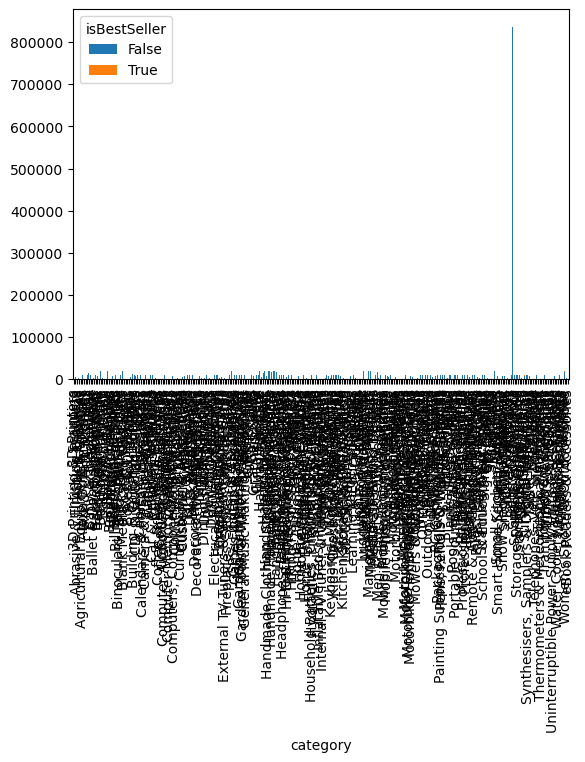

In [21]:
crosstab_result.plot(kind="bar", stacked=True)
plt.show()

In [24]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(df.shape[0])
print(df_no_outliers.shape[0])

2443651
2115963


/var/folders/sp/zmqgkgsj1992h0k71dlr78_80000gn/T/ipykernel_30602/2779519224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top20 , x='price', y='category', palette="coolwarm")


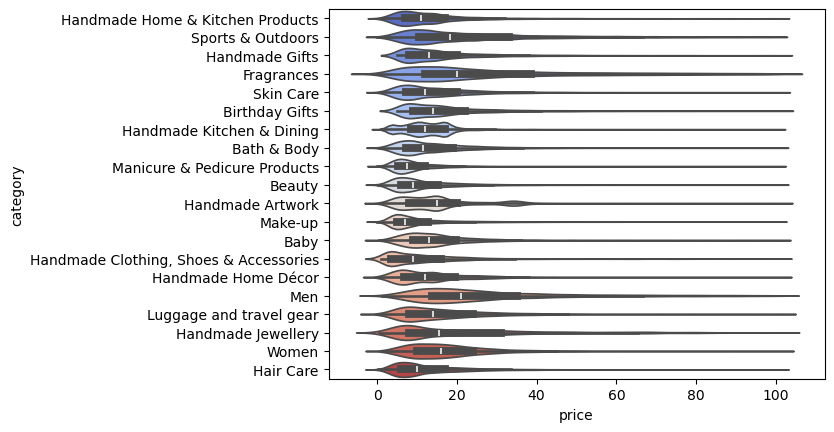

In [29]:
top_categories = df_no_outliers['category'].value_counts().head(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

sns.violinplot(data=df_top20 , x='price', y='category', palette="coolwarm")
plt.show()

### highest median price is either 'men' or 'fragrances'

/var/folders/sp/zmqgkgsj1992h0k71dlr78_80000gn/T/ipykernel_30602/2929510527.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, x='price', y='category', palette="coolwarm")


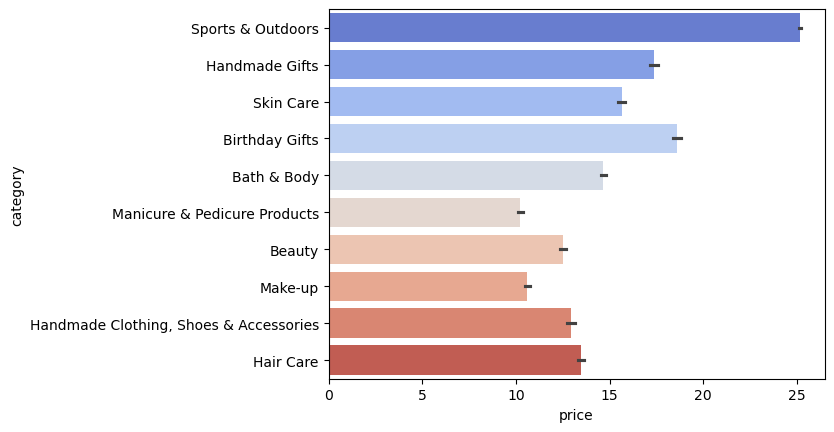

In [32]:
top_categories_10 = df_no_outliers['category'].value_counts().head(10).index
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_categories_10)]

sns.barplot(data=df_top10, x='price', y='category', palette="coolwarm")
plt.show()

### highest mean is sports & outdoor

/var/folders/sp/zmqgkgsj1992h0k71dlr78_80000gn/T/ipykernel_30602/2943861863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='price', y='category', palette="coolwarm")


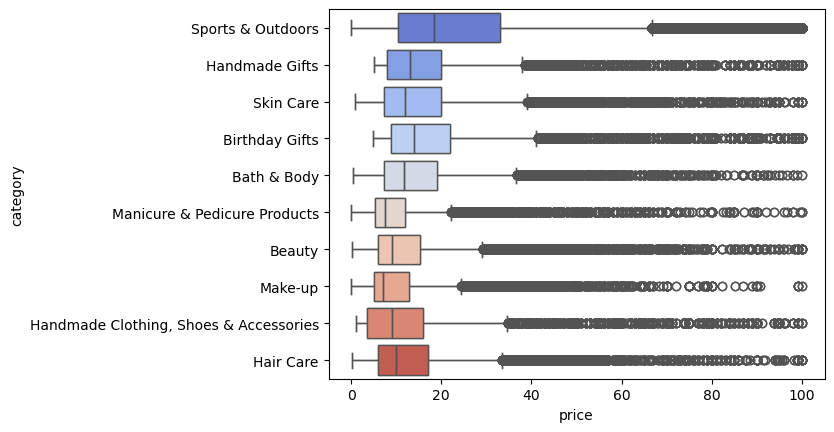

In [34]:
top_categories_10 = df_no_outliers['category'].value_counts().head(10).index
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_categories_10)]

sns.boxplot(data=df_top10, x='price', y='category', palette="coolwarm")
plt.show()

### highest median is sports & outdoor

In [36]:
correlation = df['price'].corr(df['stars'])
print(correlation)

-0.1249067326214869


In [37]:
### weak negative correlation

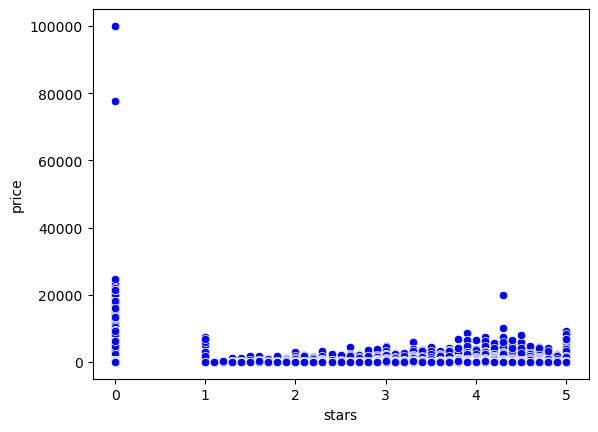

In [41]:
sns.scatterplot(data=df, x='stars', y='price', color='blue')
plt.show()

In [52]:
### numeric_df = df.select_dtypes(include='number')
### corr_matrix = numeric_df.corr()
### plt.figure(figsize=(6, 6))
### sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
### plt.show()

### this wasn't working - it wouldn't load 

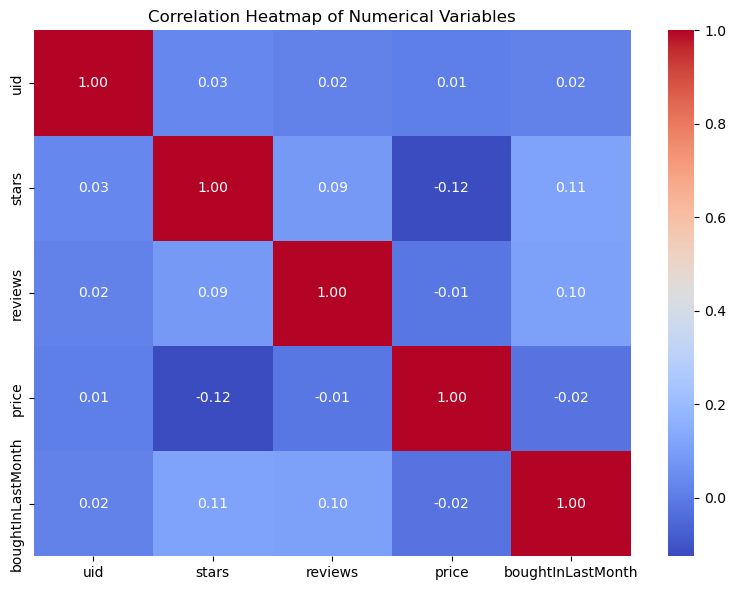

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
ax.set_title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.show()

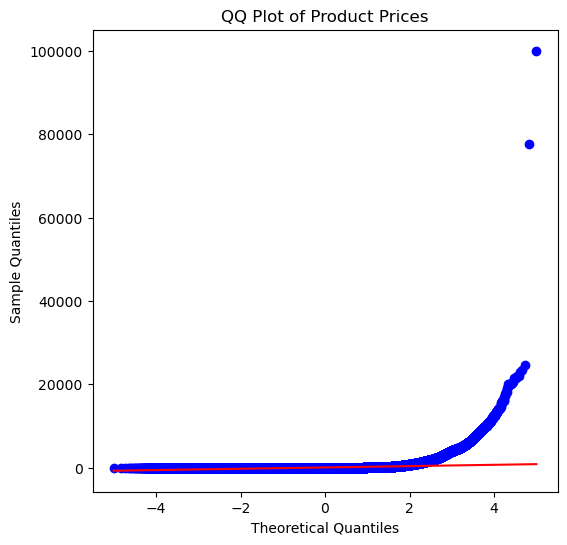

In [48]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot for price
plt.figure(figsize=(6,6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [49]:
### positive skew